In [1]:
from plotnine import *
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from data import *
import warnings
warnings.filterwarnings('ignore')
theme_set(theme_light())

from mizani.breaks import date_breaks
from mizani.formatters import date_format

%matplotlib inline

C:\Python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Axes

## Swapping X- and Y-Axes

use coord_filp() to swap the x- and y-axes on a graph

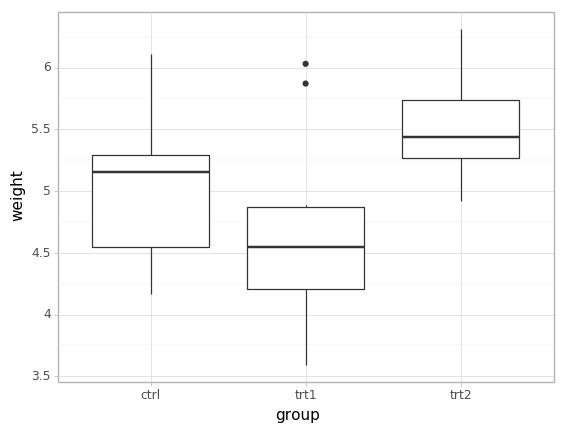

<ggplot: (82834473967)>

In [24]:
(ggplot(PlantGrowth, aes(x='group', y='weight')) + 
 geom_boxplot()
)

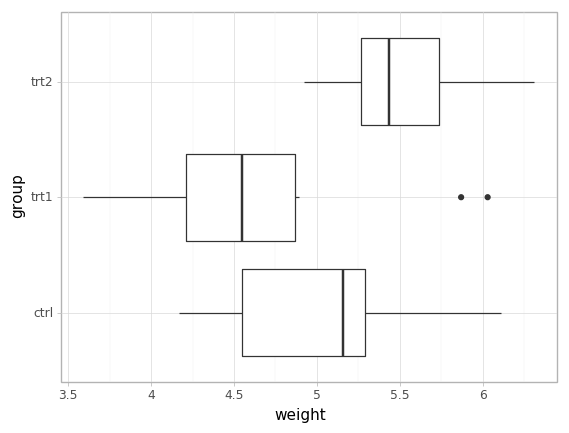

<ggplot: (82834530473)>

In [25]:
(ggplot(PlantGrowth, aes(x='group', y='weight')) + 
 geom_boxplot() +
 coord_flip() 
)

use coord_filp(), the vertical axis is still X-axes, use scale_x_discrete() can reorder the gruop sequence.

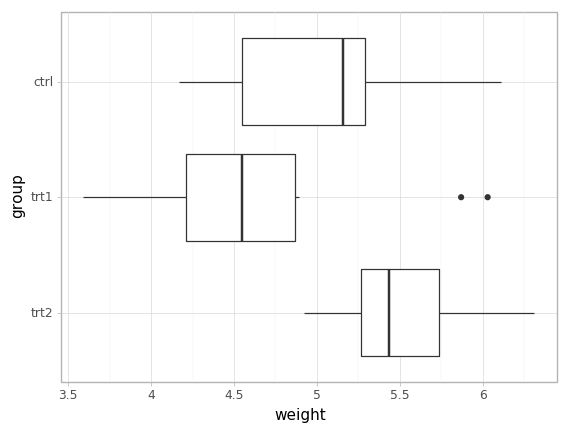

<ggplot: (-9223371954020217947)>

In [26]:
(ggplot(PlantGrowth, aes(x='group', y='weight')) + 
 geom_boxplot() +
 coord_flip() +
 scale_x_discrete(limits=PlantGrowth['group'][::-1].unique())
)

## Setting the Range of a Continuous Axis

use xlim() or ylim() to set the minimum and maximum values of a continuous axis.  
ylim() is shorthand for setting the limits with scale_y_continuous()  
ylim(0, 10)  <==>  scale_y_continuous(limits=c(0, 10))  

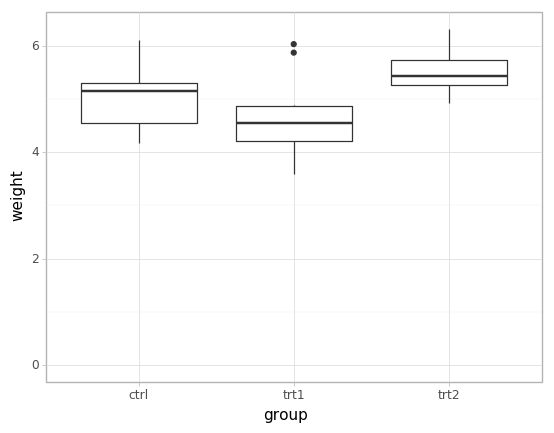

<ggplot: (82834572808)>

In [27]:
(ggplot(PlantGrowth, aes(x='group', y='weight')) + 
 geom_boxplot() +
 ylim(0,PlantGrowth['weight'].max())
)

there are two ways of setting the range of the axes. The first way is to modify the scale, and the second is to apply a coordinate transform.  
When you modify the limits of the x or y scale, any data outside of the limits is removed—that is, the out-of-range data is not only not displayed, it is removed from consideration entirely.  
With the box plots in these examples, if you restrict the y range so that some of the original data is clipped, the box plot statistics will be computed based on clipped data, and the shape of the box plots will change.

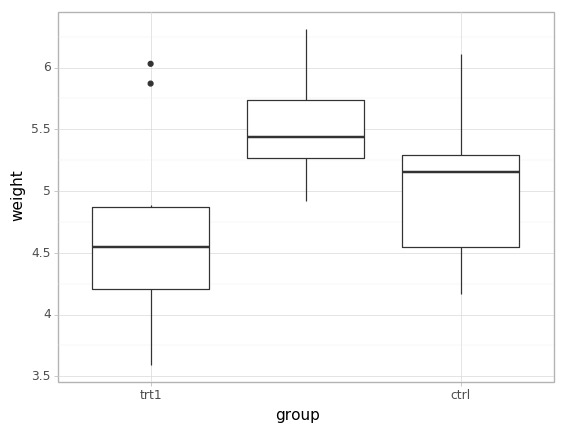

<ggplot: (-9223371954020209348)>

In [28]:
(ggplot(PlantGrowth, aes(x='group', y='weight')) + 
 geom_boxplot() +
 coord_cartesian(ylim=(5,6.5)) +# coord_cartesian failed in version 0.2
 scale_x_discrete(limits=["trt1",'trt2',"ctrl"],breaks=['trt1',None,"ctrl"]) # breaks to customize which x-label to show
)

## Reversing a Continuous Axis

Use scale_y_reverse or scale_x_reverse. The direction of an axis can also be reversed by specifying the limits in reversed order

in pandas there best way to get the subset of the boxplot is to use the subset

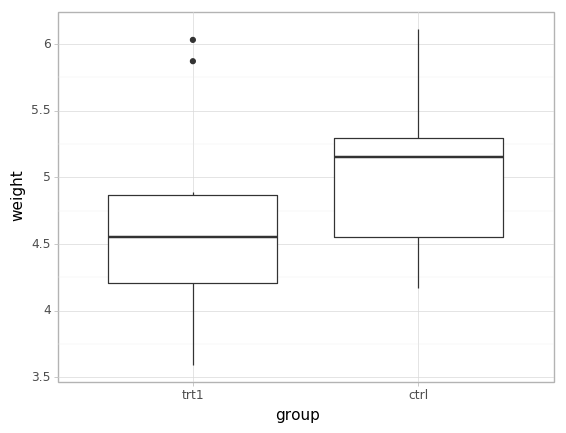

<ggplot: (82834609437)>

In [29]:
(ggplot(PlantGrowth.query('group!="trt2"'),aes('group','weight')) +
 geom_boxplot() + 
 # limits customize the specific order in x axis
 scale_x_discrete(limits=["trt1","ctrl"]) 
)

## Setting the Scaling Ratio of the X- and Y-Axes

Use coord_fixed(). This will result in a 1:1 scaling between the x- and y-axes

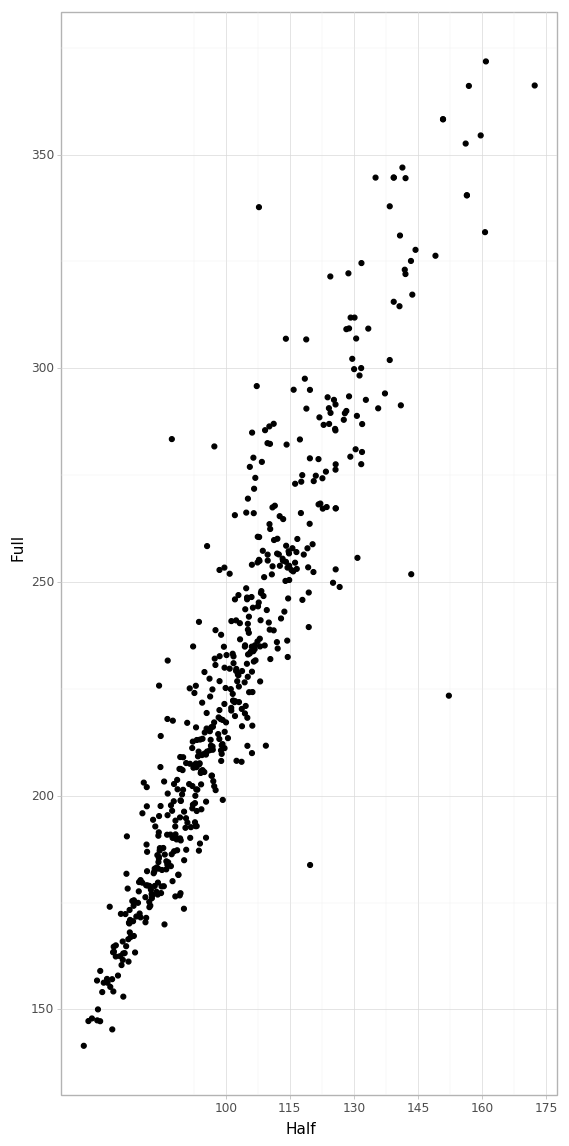

<ggplot: (-9223371954019929905)>

In [30]:
(ggplot(marathon,aes('Half','Full')) +
 geom_point() +
 coord_fixed() + # if ratio < 1 squeeze the y-axis
 scale_x_continuous(breaks=list(range(100,420,15))) + # numpy arrays doesn't work in 0.2.1
 scale_y_continuous(breaks=list(range(100,420,50)))
)

## Setting the Positions of Tick Marks

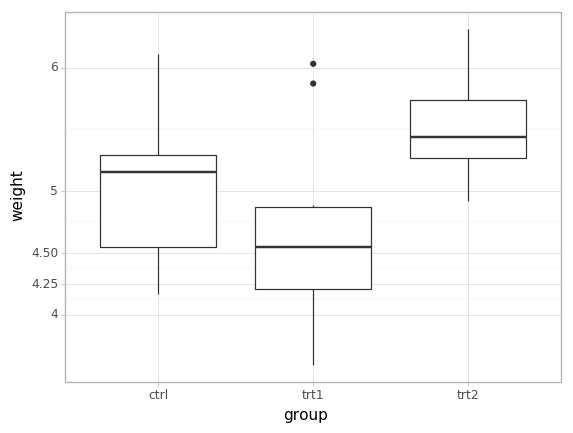

<ggplot: (82834781069)>

In [31]:
(ggplot(PlantGrowth, aes(x='group', y='weight')) + 
 geom_boxplot() +
 scale_y_continuous(breaks=[4, 4.25, 4.5, 5, 6, 8])
)

## Removing Tick Marks and Labels

- use axis_text_y=element_blank() to remove the tick labels  
  
- use axis_text_x=element_text(angle=45) to get labels with 45 degrees slope  
  
- use axis_ticks=element_blank() to remove the tick marks on both axes. (It’s not possible to hide the tick marks on just one axis.)

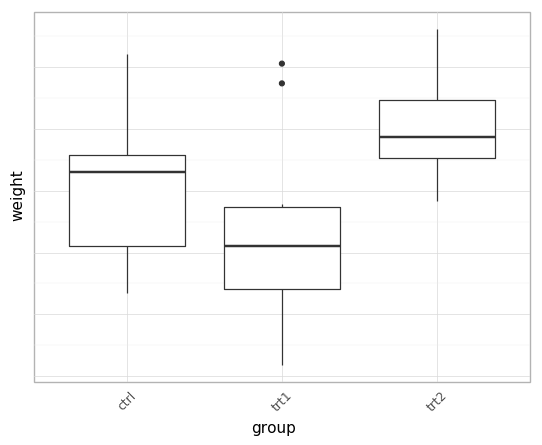

<ggplot: (82834538311)>

In [32]:
(ggplot(PlantGrowth, aes(x='group', y='weight')) + 
 geom_boxplot() +
 theme(axis_text_y=element_blank(),axis_text_x=element_text(angle=45),
      axis_ticks=element_blank())
)

- To remove the tick marks, the labels, and the grid lines,scale_y_continuous(breaks=None) set breaks to NULL(This will work for continuous axes only)  
if want to remove the discrete axes, use scale_x_discrete(breaks=None) instead.

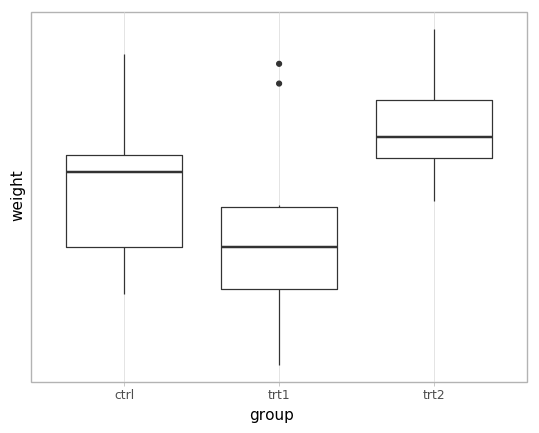

<ggplot: (82834406264)>

In [33]:
(ggplot(PlantGrowth, aes(x='group', y='weight')) + 
 geom_boxplot() +
 scale_y_continuous(breaks=None) 
)

## Changing the Text of Tick Labels

use labels option to set arbitrary labels.  
pass values to breaks and labels in thescale. One of the labels has a newline (\n) character, which tells ggplot() to put a line break there:

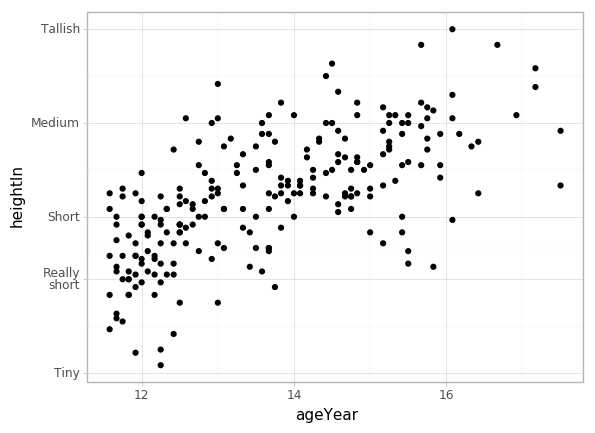

<ggplot: (-9223371954021479438)>

In [34]:
(ggplot(heightweight, aes(x='ageYear', y='heightIn')) +
 geom_point() +
 scale_y_continuous(breaks=[50,56,60,66,72],
                    labels=['Tiny','Really\nshort','Short','Medium','Tallish'])
)

Instead of setting completely arbitrary labels, it is more common to have your data stored
in one format, while wanting the labels to be displayed in anothe

In [35]:
def footinch_formatter(series_data):
    return_data=[]
    for x in series_data:
        foot = int(np.round(x/12))
        inch = x % 12
        x_footinch = '''{0}'{1}"'''.format(foot,inch)
        return_data.append(x_footinch)
    return return_data

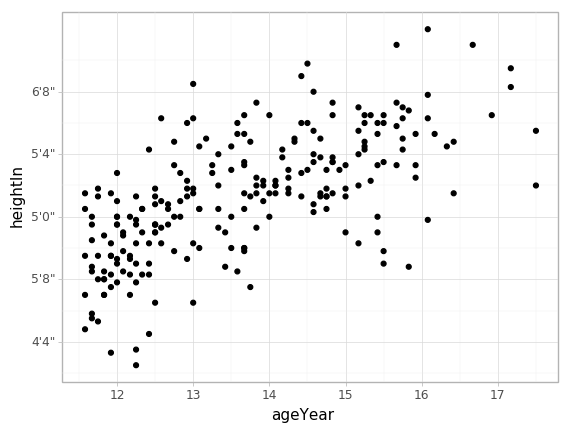

<ggplot: (82834845844)>

In [36]:
(ggplot(heightweight, aes(x='ageYear', y='heightIn')) +
 geom_point() +
 scale_y_continuous(breaks=list(range(48,72,4)),labels=footinch_formatter) + 
 scale_x_continuous(breaks=list(range(11,20,1)))
)

##  Changing the Appearance of Tick Labels

manually set the labels to be long—long enough that they overlap

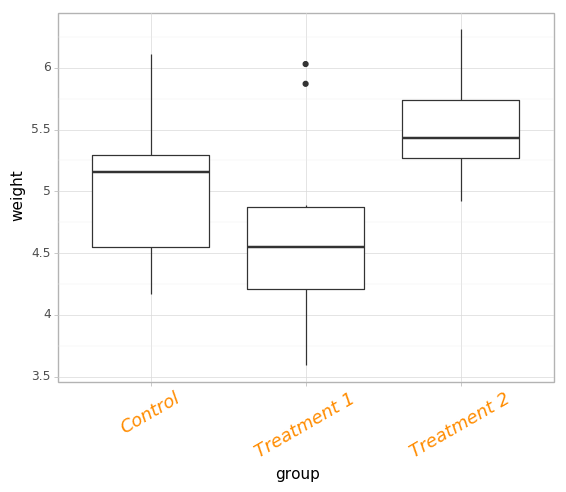

<ggplot: (-9223371954020328048)>

In [67]:
(ggplot(PlantGrowth, aes(x='group', y='weight')) + 
 geom_boxplot() +
 scale_x_discrete(breaks=["ctrl", "trt1", "trt2"],
                  labels=["Control", "Treatment 1", "Treatment 2"]) +
 theme(axis_text_x=element_text(angle=30,size=13,family='Times',
                                face='italic',color='#FF8C00'))
)

## Changing the Text of Axis Labels

- Use xlab() or ylab() to change the text of the axis labels
- use labs() to do the same thing  
- scale_x_continuous(name="Age in years")

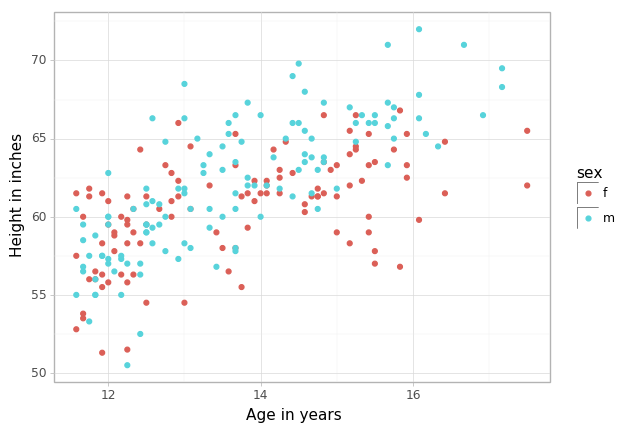

<ggplot: (-9223371954018060046)>

In [75]:
(ggplot(heightweight,aes('ageYear','heightIn',color='sex')) +
 geom_point() +
 xlab('Age in years') +
 ylab('Height in inches')
)

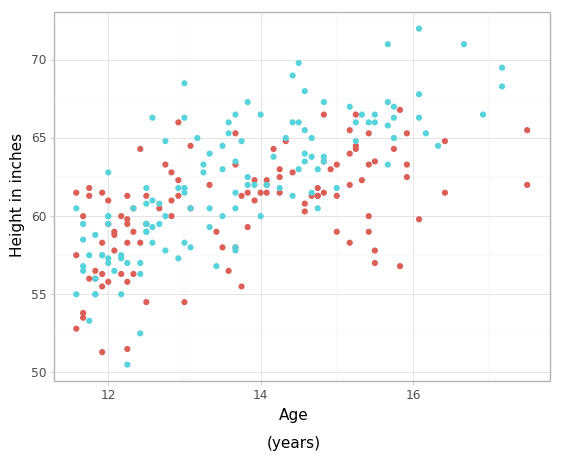

<ggplot: (82837343282)>

In [83]:
(ggplot(heightweight,aes('ageYear','heightIn',color='sex')) +
 geom_point(show_legend=False) +
 labs(x='Age\n\n(years)',y='Height in inches')
)

## Removing Axis Labels

For the x-axis label, use theme(axis_title_x=element_blank()). For the y-axis label,
do the same with axis_title_y.

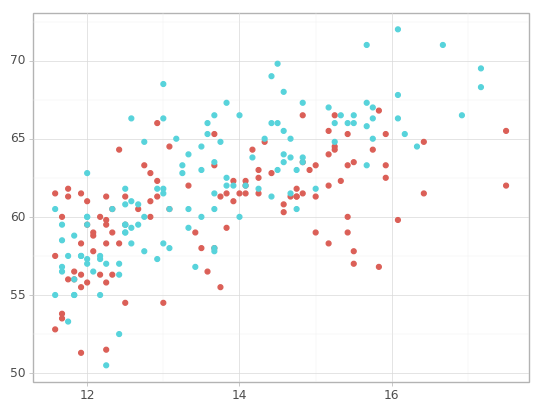

<ggplot: (82834629240)>

In [84]:
(ggplot(heightweight,aes('ageYear','heightIn',color='sex')) +
 geom_point(show_legend=False) +
 theme(axis_title_x=element_blank(),axis_title_y=element_blank())
)

## Changing the Appearance of Axis Labels

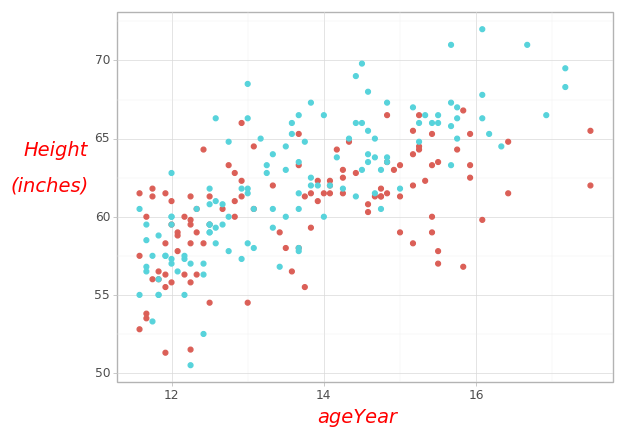

<ggplot: (-9223371954018602201)>

In [103]:
(ggplot(heightweight,aes('ageYear','heightIn',color='sex')) +
 geom_point(show_legend=False) +
 ylab('Height\n\n(inches)') +
 theme(axis_title_x=element_text(face='italic',color='red',size=14),
       axis_title_y=element_text(rotation=360,ha='right',face='italic',color='red',size=14))
)

## Showing Lines Along the Axes

Using themes, use axis_line()

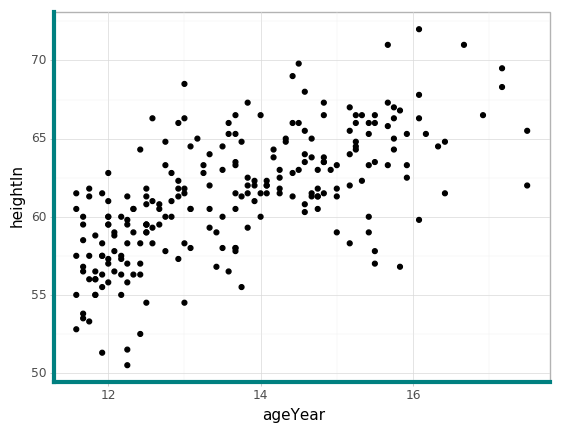

<ggplot: (82833215496)>

In [113]:
(ggplot(heightweight, aes(x='ageYear', y='heightIn')) + 
 geom_point() +
 theme(axis_line = element_line(color='#008080',size=3))
)

## Using a Logarithmic Axis

Use scale_x_log10() and/or scale_y_log10() --- where the data is distributed exponentially on both axes

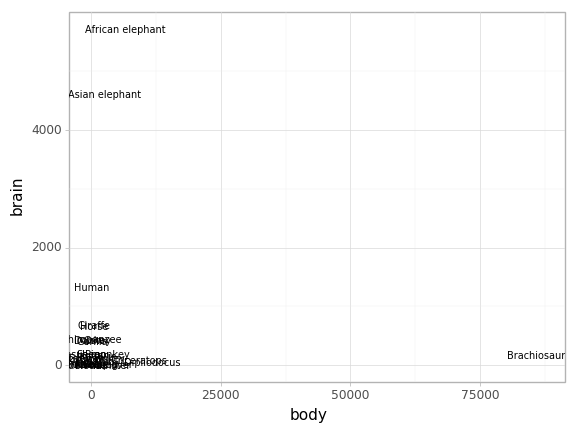

<ggplot: (-9223371888041547534)>

In [14]:
(ggplot(Animals, aes(x='body', y='brain', label=Animals.index)) +
 geom_text(size=7)
)

## label with math format

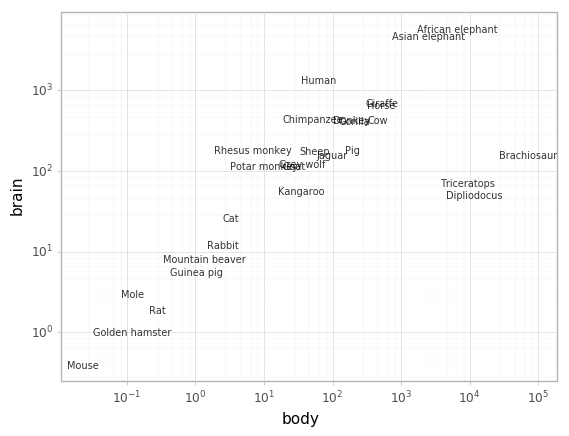

<ggplot: (118388539263)>

In [26]:
(ggplot(Animals, aes(x='body', y='brain', label=Animals.index)) +
 geom_text(size=7,alpha=0.8) +
 scale_x_log10(breaks=[10**x for x in range(-1,6)],labels=[r'$10^{%s}$'% x for x in range(-1,6)]) + 
 scale_y_log10(breaks=[10**x for x in range(0,4)],labels=[r'$10^{}$'.format(x) for x in range(0,4)])
)

## Adding Ticks for a Logarithmic Axis --- annotation_logticks()  not available in 0.2.1

## Making a Circular Graph --- coord_polar() not available in 0.2.1

## Using Dates on an Axis

the calculated breaks are awful, we need to intervene. We do so using the [date_breaks](https://mizani.readthedocs.io/en/stable/breaks.html#mizani.breaks.date_breaks) and [date_format](https://mizani.readthedocs.io/en/stable/formatters.html#mizani.formatters.date_format) functions from mizani.

**date_breaks:**
>class mizani.breaks.date_breaks(width=None)[source]
Regularly spaced dates

>Parameters:	width (str | None) – An interval specification. **Must be one of [minute, hour, day, week, month, year].** If None, the interval automatic

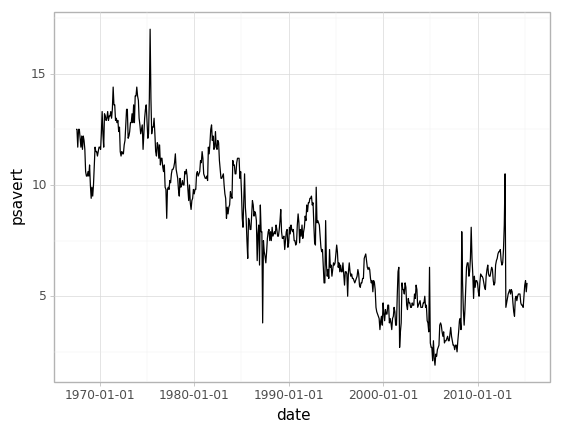

<ggplot: (-9223371937908032617)>

In [13]:
(ggplot(economics,aes('date','psavert')) +
 geom_line() +
 scale_x_datetime(breaks=date_breaks('10 year'))
)

Since all the breaks are at the beginning of the year, we can omit the month and day. Using date_format we override the format string. For more on the options for the format string see the [strftime behavior](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior).

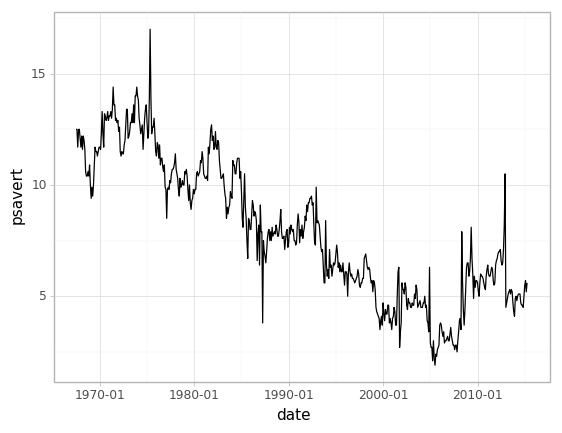

<ggplot: (-9223371894443153962)>

In [5]:
(ggplot(economics,aes('date','psavert')) +
 geom_line() +
 scale_x_datetime(breaks=date_breaks('10 year'),labels=date_format('%Y-%m')) 
)

use a custom formatting function to get results that are not obtainable with the date_format function. For example if we have monthly breaks over a handful of years we can mix date formats as follows; specify beginning of the year and every other month. Such tricks can be used reduce overcrowding.

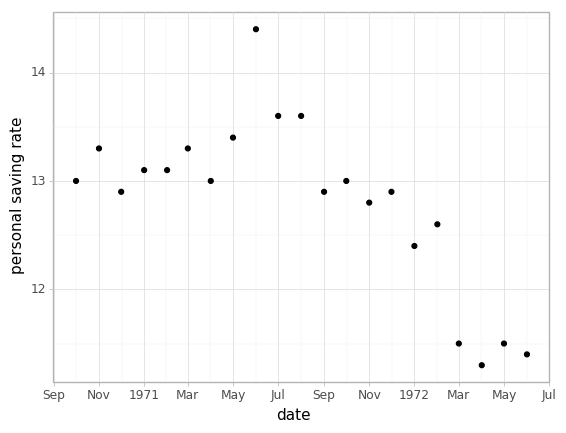

<ggplot: (-9223371894443024661)>

In [9]:
from datetime import date

def custom_date_format2(breaks):
    """
    Function to format the date
    """
    res = []
    for x in breaks:
        # First day of the year
        if x.month == 1 and x.day == 1:
            fmt = '%Y'
        # Every other month
        elif x.month % 2 != 0:
            fmt = '%b'
        else:
            fmt = ''
            
        res.append(date.strftime(x, fmt))
            
    return res

def custom_date_breaks(width=None):
    """
    Create a function that calculates date breaks
    
    It delegates the work to `date_breaks`
    """
    def filter_func(limits):
        breaks = date_breaks(width)(limits)
        # filter
        return [x for x in breaks if x.month % 2]
    
    return filter_func

(ggplot(economics.loc[40:60, :])
 + geom_point(aes('date', 'psavert'))
 + scale_x_datetime(
     breaks=custom_date_breaks('1 month'),
     labels=custom_date_format2)
 + labs(y='personal saving rate')
)